In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('ENB2012_data.csv')
df_original = df.copy()
df.sample(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
588,0.82,612.5,318.5,147.0,7.0,2,0.40,2,28.95,30.34
363,0.74,686.0,245.0,220.5,3.5,5,0.25,2,12.30,15.44
324,0.66,759.5,318.5,220.5,3.5,2,0.25,1,13.17,16.39
711,0.66,759.5,318.5,220.5,3.5,5,0.40,4,15.30,18.24
27,0.74,686.0,245.0,220.5,3.5,5,0.00,0,6.04,11.17


# Basic Statistical information

In [9]:
df.shape

(768, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
print('Missing values:\n', df.isnull().sum())

Missing values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [8]:
print('Duplicated rows:', df.duplicated().sum())

Duplicated rows: 0


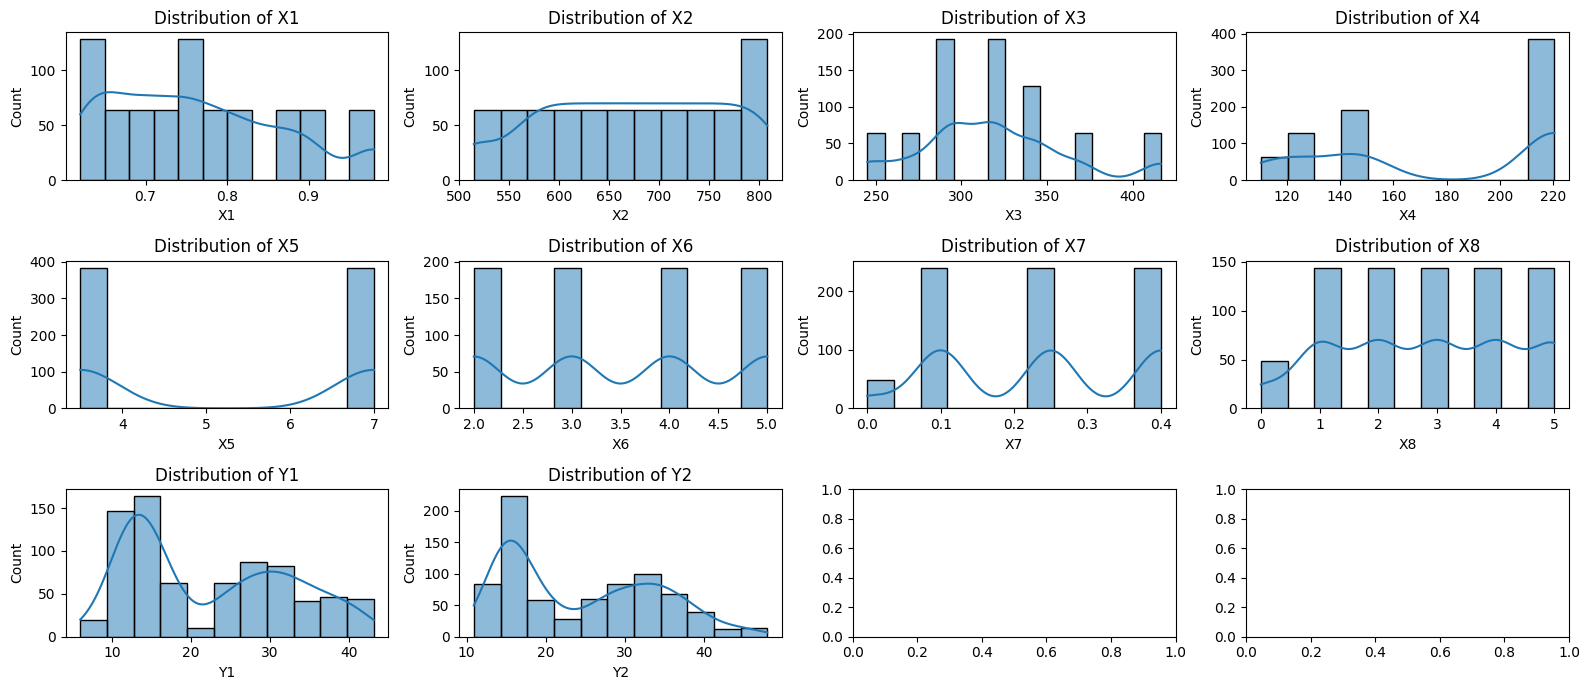

In [10]:
# Distribution of given data
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize=(16,7))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

<Axes: >

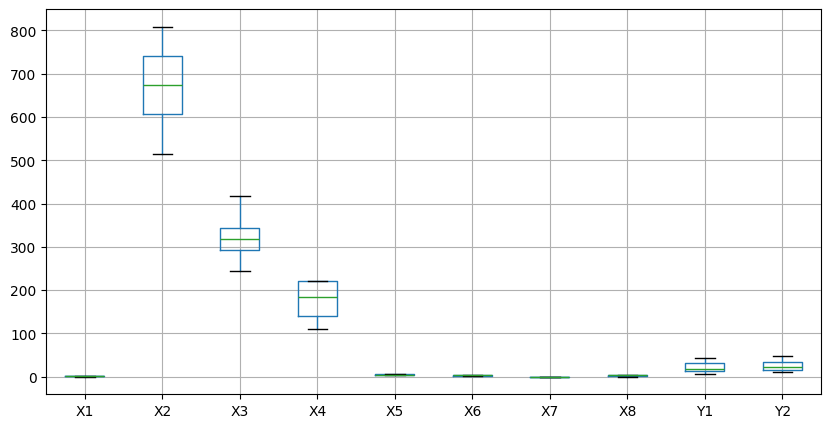

In [15]:
# Boxplot to check for outliers
df.boxplot(figsize=(10,5))

<Axes: title={'center': 'Correlation Matrix'}>

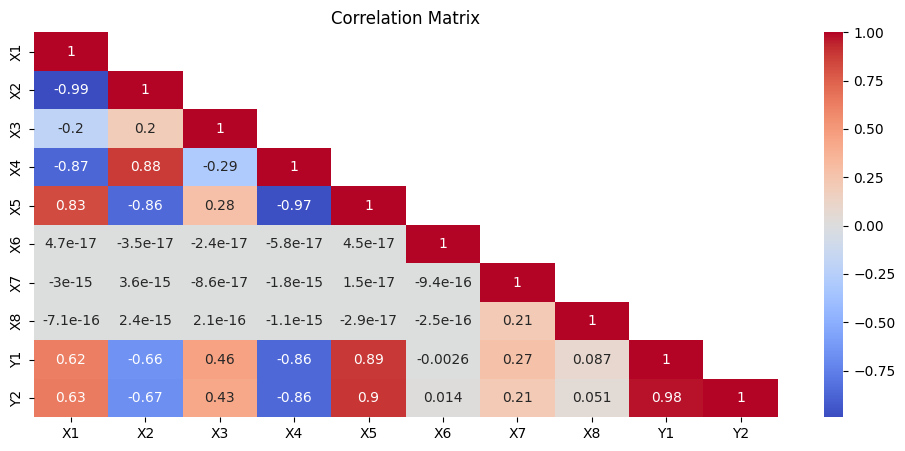

In [26]:
# Calculating correlation and plotting correlation matrix
plt.figure(figsize=(12,5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1) #create a mask to hide redundant vales in correlation matrix
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')

## Observations:
1. There are 2 target variables and 8 input variables
2. Target variables are stringly correlated with each other
3. Input variables X1,X3,X5 have strong positive correlation with target variables and X2,X4 have strong negative correlation with target variables
4. Input variables X6,X7,X8 have almost no correlation with target variables
5. Looking at the boxplot there are no outliers in our data

# Training Models

In [28]:
# As this is a multi-output regression problem following are approaches to solve it:
# 1. Train a Multi-output regression model with our desired model
# 2. Train model individually for each output variable
# 3. Use stacked/chained training basically using the prediction for one output variable as input for next output variable
# 4. Use models that support multi-output regression

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
target = ['Y1', 'Y2']
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Approach 1: Using multioutput regressor
models = {
    'Linear Regressor': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'GB Regressor': GradientBoostingRegressor(),
    'XGB Regressor': XGBRegressor(),
    'LGBM Regressor': LGBMRegressor(),
}
results = {}
for name, model in models.items():
    multi_output_model = MultiOutputRegressor(model)

    #model training
    print(f'Training {name}......')
    multi_output_model.fit(X_train, y_train)

    #making predictions
    preds = multi_output_model.predict(X_test)

    #evaluating the model
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    }

    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print("\n")

Training Linear Regressor......
Linear Regressor Results:
  MSE: 0.0997
  RMSE: 0.3158
  MAE: 0.2237
  R²: 0.9027


Training Random Forest Regressor......
Random Forest Regressor Results:
  MSE: 0.0188
  RMSE: 0.1372
  MAE: 0.0754
  R²: 0.9816


Training GB Regressor......
GB Regressor Results:
  MSE: 0.0140
  RMSE: 0.1182
  MAE: 0.0747
  R²: 0.9864


Training XGB Regressor......
XGB Regressor Results:
  MSE: 0.0050
  RMSE: 0.0704
  MAE: 0.0364
  R²: 0.9952


Training LGBM Regressor......
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score -0.015091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [48]:
results = pd.DataFrame(results)
results

,Linear Regressor,Random Forest Regressor,GB Regressor,XGB Regressor,LGBM Regressor
MSE,0.099739,0.018814,0.013969,0.004951,0.008111
MAE,0.223653,0.075386,0.074653,0.036447,0.056319
RMSE,0.315815,0.137164,0.118191,0.070363,0.090061
R2 Score,0.902705,0.981647,0.986373,0.995170,0.992088
